### Master sheet for figures in Figure 3
Figure list:
1. Speed of movement MO + Mutant
\Todo: speed files for mutant exp2

2. Network density keratin MO 

3. Junctional Intensity vs Apical intensity

4. Intensity Density Time plot

5. Keratin 18 intensity

6. Area

7. Laser cuts recoil velocity

In [3]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from re import findall as find

In [3]:
data1="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/21032023_K4K8onecellMo/EpiSpeedAnalysis/EpiSpeed_21032023_K4K8MOveldata.xlsx"
data2="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/N2Vprocessed/EpispeedAnalysis_03042023/EpiSpeedAnalysis_19012023_K4K8MOveldata.xlsx"
outputfolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMorphantSpeed/"

In [4]:
#read data using pandas read excel and make a pandas dataframe with data from both data 1 and data2
df1=pd.read_excel(data1)
df2=pd.read_excel(data2)

In [5]:
binnedEpiSpeedData=pd.DataFrame()
bin_edges= np.arange(4,10.7,0.5)
# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedEpiSpeedData["Time (hpf)"]=bin_centers

controlcolumns21303=["vPos001","vPos002"]
controlcolumns19012023=["1901vPos001","1901vPos002"]
k4k8mocols21303=["vPos003","vPos004"]
k4k8mocols19012023=["1901vPos003","1901vPos004"]
for column in controlcolumns21303:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(df1[column][(df1["Time"]>=bin_edges[i]) & (df1["Time"]<bin_edges[i+1])])
    binnedEpiSpeedData["control_210323_"+column]=bin_averages
for column in controlcolumns19012023:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(df2[column][(df2["Time (hpf)"]>=bin_edges[i]) & (df2["Time (hpf)"]<bin_edges[i+1])])
    binnedEpiSpeedData["control_"+column]=bin_averages
for column in k4k8mocols21303:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(df1[column][(df1["Time"]>=bin_edges[i]) & (df1["Time"]<bin_edges[i+1])])
    binnedEpiSpeedData["K4K8MO_210323_"+column]=bin_averages
for column in k4k8mocols19012023:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(df2[column][(df2["Time (hpf)"]>=bin_edges[i]) & (df2["Time (hpf)"]<bin_edges[i+1])])
    binnedEpiSpeedData["K4K8MO_"+column]=bin_averages 

In [6]:
binnedEpiSpeedData

,Time (hpf),control_210323_vPos001,control_210323_vPos002,control_1901vPos001,control_1901vPos002,K4K8MO_210323_vPos003,K4K8MO_210323_vPos004,K4K8MO_1901vPos003,K4K8MO_1901vPos004
0,4.25,0.976480,0.779315,1.087089,0.476390,0.691682,0.940903,1.014341,1.007122
1,4.75,1.572741,1.117819,1.331285,0.939122,0.771340,0.954112,0.542764,0.938699
2,5.25,1.218411,1.230498,1.510439,1.332976,1.199782,0.910997,0.948358,0.537659
3,5.75,1.411558,1.248349,2.435480,1.536715,1.219969,0.742087,1.083350,0.645203
4,6.25,1.510374,1.885358,2.050211,1.232228,1.424798,0.931682,1.278341,0.793821
5,6.75,1.656355,1.618505,2.519154,1.362602,1.650467,0.885421,1.187610,1.151122
6,7.25,2.633551,2.074206,2.690634,1.937593,1.450312,0.880249,1.524813,1.088195
7,7.75,2.612368,2.611308,NaN,2.128780,1.310997,0.554206,1.186732,1.131057
8,8.25,NaN,NaN,NaN,2.102244,2.082399,1.396791,1.012618,1.028358
9,8.75,NaN,NaN,NaN,NaN,1.624346,0.954206,1.313951,1.211317


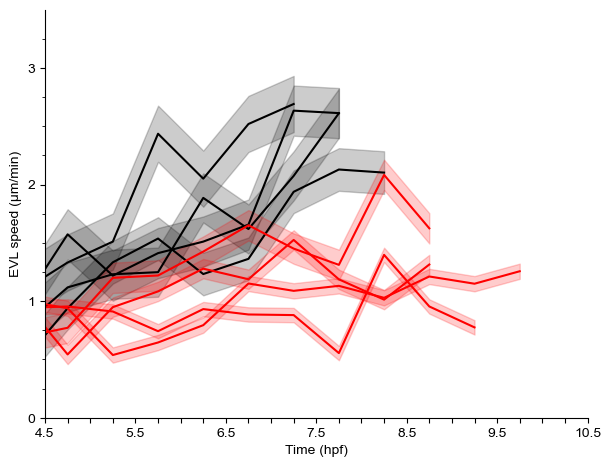

In [7]:
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlabel("Time (hpf)")
ax.set_ylabel("EVL speed (μm/min)")
ax.set_xlim(4.5,10.0)
ax.set_xticks(np.arange(4.5,10.7,0.25))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)
ax.set_ylim(0,3.5)
ax.set_yticks(np.arange(0,3.5,0.25),minor=True)

#Grouping the columns in binnedEpispeedData dataframe into control and k4k8mo columns and then plotting the average of each group as a line plot with error bars as a ribbon around the line
controlcolumns=["control_210323_vPos001","control_210323_vPos002","control_1901vPos001","control_1901vPos002"]
k4k8mocols=["K4K8MO_210323_vPos003","K4K8MO_210323_vPos004","K4K8MO_1901vPos003","K4K8MO_1901vPos004"]
for column in controlcolumns:
    ax.plot(binnedEpiSpeedData["Time (hpf)"],binnedEpiSpeedData[column],color="black")#,linewidth=3
    ax.fill_between(binnedEpiSpeedData["Time (hpf)"],binnedEpiSpeedData[column]-binnedEpiSpeedData[column].sem(),binnedEpiSpeedData[column]+binnedEpiSpeedData[column].sem(),alpha=0.2,color="black")
for column in k4k8mocols:
    ax.plot(binnedEpiSpeedData["Time (hpf)"],binnedEpiSpeedData[column],color="red")#,linewidth=3
    ax.fill_between(binnedEpiSpeedData["Time (hpf)"],binnedEpiSpeedData[column]-binnedEpiSpeedData[column].sem(),binnedEpiSpeedData[column]+binnedEpiSpeedData[column].sem(),alpha=0.2,color="red")
plt.savefig(outputfolder+"KeratinMorphantSpeed_trials.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"KeratinMorphantSpeed_trials.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"KeratinMorphantSpeed_trials.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.show()

In [8]:
df3=pd.read_excel("H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/05_Mai/03052023_Mut1/K4K8mutant_velocitydf.xlsx")
mutantcolumns=["vPos003","vPos004","vPos005"]
for column in mutantcolumns:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(df3[column][(df3["Time"]>=bin_edges[i]) & (df3["Time"]<bin_edges[i+1])])
    binnedEpiSpeedData["K4K8mutant_03052023_"+column]=bin_averages

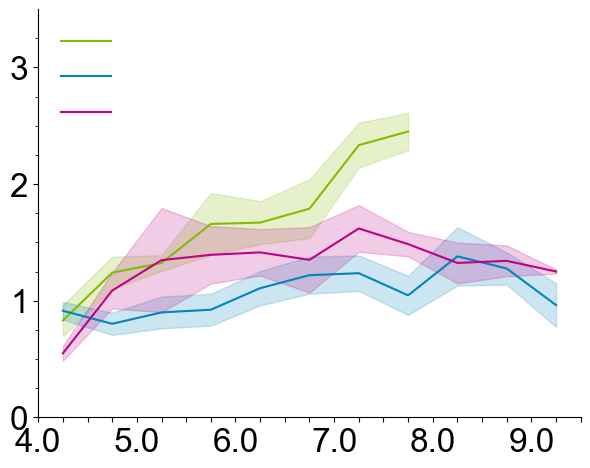

In [ ]:
mutantcolumns=["K4K8mutant_03052023_vPos003","K4K8mutant_03052023_vPos004","K4K8mutant_03052023_vPos005"]
controlcolumns=["control_210323_vPos001","control_210323_vPos002","control_1901vPos001","control_1901vPos002"]
k4k8mocols=["K4K8MO_210323_vPos003","K4K8MO_210323_vPos004","K4K8MO_1901vPos003","K4K8MO_1901vPos004"]
controlmean=binnedEpiSpeedData[controlcolumns].mean(axis=1)
controlsem=binnedEpiSpeedData[controlcolumns].sem(axis=1)
morphantmean=binnedEpiSpeedData[k4k8mocols].mean(axis=1)
morphantsem=binnedEpiSpeedData[k4k8mocols].sem(axis=1)
mutantmean=binnedEpiSpeedData[mutantcolumns].mean(axis=1)
mutantsem=binnedEpiSpeedData[mutantcolumns].sem(axis=1)

#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("Speed (μm/min)")

ax.set_xticks(np.arange(4.0,10.7,0.25))
ax.set_xticklabels(["4.0","","","","5.0","","","","6.0","","","","7.0","","","","8.0","","","","9.0","","","","10.0","",""]) 
ax.set_ylim(0,3.5)
ax.set_yticks(np.arange(0,3.5,0.25),minor=True)

ax.plot(binnedEpiSpeedData["Time (hpf)"][:8],controlmean[:8],color="#83bb03",label=" ")
ax.fill_between(binnedEpiSpeedData["Time (hpf)"][:-1],controlmean[:-1]-controlsem[:-1],controlmean[:-1]+controlsem[:-1],alpha=0.2,color="#83bb03")
ax.plot(binnedEpiSpeedData["Time (hpf)"][:-2],morphantmean[:-2],color="#0383bb",label="  ")
ax.fill_between(binnedEpiSpeedData["Time (hpf)"][:-1],morphantmean[:-1]-morphantsem[:-1],morphantmean[:-1]+morphantsem[:-1],alpha=0.2,color="#0383bb")
ax.plot(binnedEpiSpeedData["Time (hpf)"],mutantmean,color="#bb0383",label="   ")
ax.fill_between(binnedEpiSpeedData["Time (hpf)"],mutantmean-mutantsem,mutantmean+mutantsem,alpha=0.2,color="#bb0383")
plt.legend(loc="upper left",frameon=False,fontsize=18)
plt.savefig(outputfolder+"KeratinMorphantSpeed_nolab.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"KeratinMorphantSpeed_nolab.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"KeratinMorphantSpeed_nolab.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.show()
binnedEpiSpeedData.to_csv(outputfolder+"KeratinMorphantSpeed.csv",index=False)

Figure Area and delArea

In [10]:
folder1="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\01_Jan\\19012023_K4K8onecell_G\\N2Vprocessed\\Imageseqs\\ControlEmbyos\\Pos001\\CP\\Imageseq\\AreaAnalysisFigure3\\"
folder2=""
areafiles=glob(folder1+"*.csv")
areafiles.sort()
areafiles

['H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\01_Jan\\19012023_K4K8onecell_G\\N2Vprocessed\\Imageseqs\\ControlEmbyos\\Pos001\\CP\\Imageseq\\AreaAnalysisFigure3\\Results_f01_IntensityArea_Pos001_19012023.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\01_Jan\\19012023_K4K8onecell_G\\N2Vprocessed\\Imageseqs\\ControlEmbyos\\Pos001\\CP\\Imageseq\\AreaAnalysisFigure3\\Results_f02_IntensityArea_Pos001_19012023.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\01_Jan\\19012023_K4K8onecell_G\\N2Vprocessed\\Imageseqs\\ControlEmbyos\\Pos001\\CP\\Imageseq\\AreaAnalysisFigure3\\Results_f03_IntensityArea_Pos001_19012023.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\01_Jan\\19012023_K4K8onecell_G\\N2Vprocessed\\Imageseqs\\ControlEmbyos\\Pos001\\CP\\Imageseq\\AreaAnalysisFigure3\\Results_f04_IntensityArea_Pos001_19012023.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\01_Jan\\19012023_K4K8onecell_G\\N2Vprocessed\\Imageseqs\\ControlEmbyos\\P

Mosaics for keratin MO 
analysis done by following the edge speed 
4 embryos with control velocity from uninjected clone and from keratin MO clone

In [5]:
velPd.columns

Index(['time', '2803_Pos005_control', '2803_Pos005_mosaic',
       '2803_Pos002_control', '2803_Pos002_mosaic', '2803_Pos001_control',
       '2803_Pos001_mosaics', 'Time2', '2703_Pos006_control',
       '2703_Pos006_mosaic'],
      dtype='object')

In [19]:
#Mosaic injection speed analysis
folder1="B:/home/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/28032023_K4K8MosaicGood/Pos002_goodlat/Moasicspeed/"
folder2="B:/home/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/28032023_K4K8MosaicGood/Pos001_goodlateral/Moasicspeed/"
folder3="B:/home/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/28032023_K4K8MosaicGood/Pos005_generalinjbutgood/Moasicspeed/"
folder4="B:/home/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/27032023_K4K8Mosaicgood/Pos006_mostlyYSL/MosaicSpeed/"
csvfile="B:/home/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/27032023_K4K8Mosaicgood/Pos006_mostlyYSL/Mosaicspeeds/280327032023_Mosaicvel_pd.csv"
timefolder27=937.61
timefolder28=1135.17
velPd=pd.read_csv(csvfile)
binnedMOMosaic=pd.DataFrame()
bin_edges= np.arange(4,10.7,0.5)
# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedMOMosaic["Time (hpf)"]=bin_centers
velpd2803Ccolumns=["2803_Pos005_control","2803_Pos002_control","2803_Pos001_control"]
velpd2803MOcolumns=["2803_Pos005_mosaic","2803_Pos002_mosaic","2803_Pos001_mosaic"]
velpd2703Ccolumns=["2703_Pos006_control"]
velpd2703MOcolumns=["2703_Pos006_mosaic"]
for column in velpd2803Ccolumns:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(velPd[column][(velPd["time"]>=bin_edges[i]) & (velPd["time"]<bin_edges[i+1])])
    binnedMOMosaic[column]=bin_averages
for column in velpd2803MOcolumns:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(velPd[column][(velPd["time"]>=bin_edges[i]) & (velPd["time"]<bin_edges[i+1])])
    binnedMOMosaic[column]=bin_averages
for column in velpd2703Ccolumns:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(velPd[column][(velPd["Time2"]>=bin_edges[i]) & (velPd["Time2"]<bin_edges[i+1])])
    binnedMOMosaic[column]=bin_averages
for column in velpd2703MOcolumns:
    bin_averages = np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        bin_averages[i]=np.mean(velPd[column][(velPd["Time2"]>=bin_edges[i]) & (velPd["Time2"]<bin_edges[i+1])])
    binnedMOMosaic[column]=bin_averages

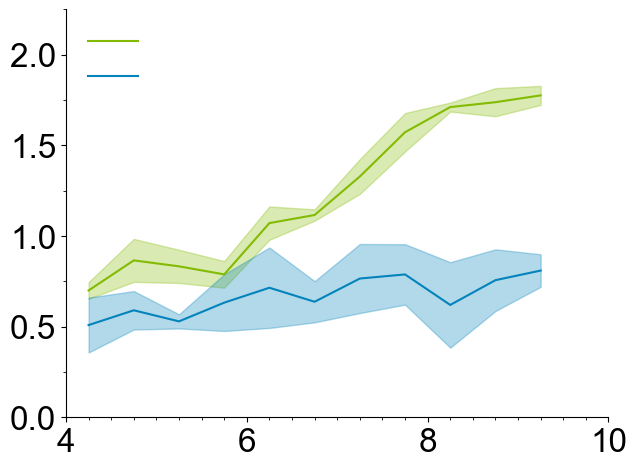

In [31]:
controlcolumns=velpd2803Ccolumns+velpd2703Ccolumns
Mosaiccolumns=velpd2803MOcolumns+velpd2703MOcolumns
controlmean=binnedMOMosaic[controlcolumns].mean(axis=1)
controlsem=binnedMOMosaic[controlcolumns].sem(axis=1)
Mosaicmean=binnedMOMosaic[Mosaiccolumns].mean(axis=1)
Mosaicsem=binnedMOMosaic[Mosaiccolumns].sem(axis=1)
# Plot the speed data for the control and experiments
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_ylabel("EVL speed (μm/min)")
ax.set_xlim([4,10])
ax.set_ylim([1.0,2.0])
ax.xaxis.set_ticks(np.arange(4, 10, 0.25),minor=True)
ax.set_yticks(np.arange(0,2.5,0.25),minor=True)

ax.plot(binnedMOMosaic["Time (hpf)"],controlmean,color="#83bb03",label="      ")
ax.fill_between(binnedMOMosaic["Time (hpf)"],controlmean-controlsem,controlmean+controlsem,alpha=0.3,color="#83bb03")
ax.plot(binnedMOMosaic["Time (hpf)"],Mosaicmean,color="#0383bb",label="     ")
ax.fill_between(binnedMOMosaic["Time (hpf)"],Mosaicmean-Mosaicsem,Mosaicmean+Mosaicsem,alpha=0.3,color="#0383bb")
plt.legend(loc="upper left",frameon=False,fontsize=18)
outputfolder="B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMosaicSpeed/"
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMosaicSpeed/KeratinMosaicSpeed_nolab.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMosaicSpeed/KeratinMosaicSpeed_nolab.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMosaicSpeed/KeratinMosaicSpeed_nolab.svg",transparent=True,bbox_inches='tight',dpi=300)
binnedMOMosaic.to_csv("B:/home/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMosaicSpeed/KeratinMosaicSpeed.csv",index=False)
plt.show()

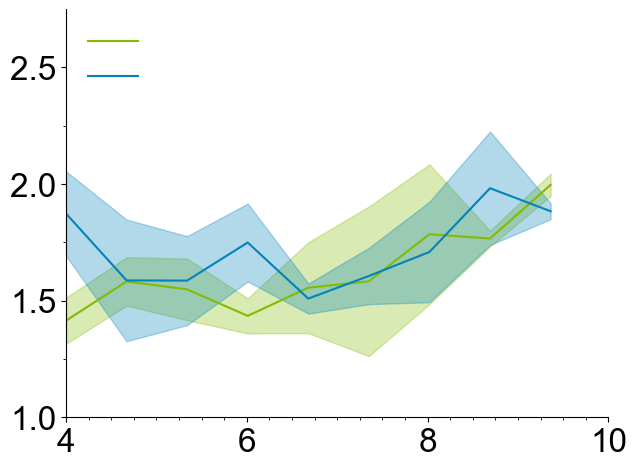

In [21]:
csvfile="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinRescueSpeed/CrossRescue_25102023.csv"
rescueDf=pd.read_csv(csvfile)
controlcolumns=["MO_Pos001","MO_Pos002","MO_Pos003"]
rescuecolumns=["Res_Pos004","Res_Pos005","Res_Pos006"]
controlmean=rescueDf[controlcolumns].mean(axis=1)
controlsem=rescueDf[controlcolumns].sem(axis=1)
rescuemean=rescueDf[rescuecolumns].mean(axis=1)
rescuesem=rescueDf[rescuecolumns].sem(axis=1)
rescueDf["Time (hpf)"]=4+(rescueDf["timeID"]-1)*0.67
# Plot the speed data for the control and experiments
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_ylabel("EVL speed (μm/min)")
ax.set_xlim([4,10])
ax.set_ylim([1,2.75])
ax.xaxis.set_ticks(np.arange(4, 10, 0.25),minor=True)
ax.set_yticks(np.arange(1,2.5,0.25),minor=True)
ax.plot(rescueDf["Time (hpf)"],controlmean,color="#83bb03",label="      ")
ax.fill_between(rescueDf["Time (hpf)"],controlmean-controlsem,controlmean+controlsem,alpha=0.3,color="#83bb03")
ax.plot(rescueDf["Time (hpf)"],rescuemean,color="#0383bb",label="     ")
ax.fill_between(rescueDf["Time (hpf)"],rescuemean-rescuesem,rescuemean+rescuesem,alpha=0.3,color="#0383bb")
plt.legend(loc="upper left",frameon=False,fontsize=18)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinRescueSpeed/KeratinRescueSpeed_nolab.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinRescueSpeed/KeratinRescueSpeed_nolab.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinRescueSpeed/KeratinRescueSpeed_nolab.svg",transparent=True,bbox_inches='tight',dpi=300)
rescueDf.to_csv("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinRescueSpeed/KeratinRescueSpeed.csv",index=False)
plt.show()

In [15]:
correlations=[]
for file in areafiles:
    df=pd.read_csv(file)
    plt.figure(figsize=(7, 5.3))
    plt.scatter(df["Mean"],df["Angle"],color="#83bb03",s=10)
    corr=df["Mean"].corr(df["Angle"])  
    correlations.append(corr)


NameError: name 'areafiles' is not defined

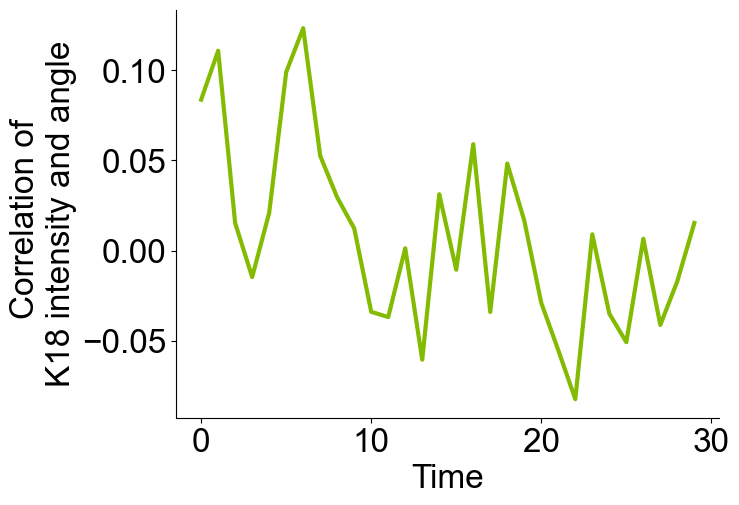

In [12]:
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure3\\KeratinMeanAngleCorrelation\\"
if os.path.exists(outputfolder)==False:
    os.mkdir(outputfolder)
plt.figure(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.xlabel("Time")
plt.ylabel("Correlation of \nK18 intensity and angle")
plt.plot(correlations,color="#83bb03",linewidth=3)
plt.savefig(outputfolder+"KeratinMeanAngleTestCorrelation.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"KeratinMeanAngleTestCorrelation.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"KeratinMeanAngleTestCorrelation.svg",transparent=True,bbox_inches='tight',dpi=300)

Figures for areaintensity density graph and density plots

In [13]:
folder1="H:/PHD_data/Imaging_et_analysis/NikSD/2024/01_Jan/18012024/NetworkAnalysis_Mutant/"
folder2="H:/PHD_data/Imaging_et_analysis/NikSD/2023/01_Jan/24012023_K4K8MOonecell/NetworkAnalysis_K4K8MO/ResultFiles/"
folder3="H:/PHD_data/Imaging_et_analysis/NikSD/2022/10-Oct/18102022_K8K4MO/NetworkAnalysis/"
networkfiles1=sorted(glob(folder1+"/*/*.csv"))
networkfiles2=sorted(glob(folder2+"/*NetworkAnalysis*_Pos002*.csv"))
networkfiles3=sorted(glob(folder3+"/*/Resultsfile/*.csv"))

In [14]:
class NetworkDataProcessor:
    """
    A class for processing network data files for network density and NDA figures. 

    Attributes:
        networkfiles (list): A list of network data file paths.
        columns (list): A list of column names for the processed data.

    Methods:
        process_files(pos, label): Processes the network data files and returns a DataFrame.
    """

    def __init__(self, networkfiles):
        """
        Initializes a NetworkDataProcessor object.

        Args:
            networkfiles (list): A list of network data file paths.
        """

        self.networkfiles = networkfiles
        self.columns = ["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"]

    def process_files(self, pos, label):
        """"
        Processes the network data files and returns a DataFrame.
        
        """
        df = pd.DataFrame(columns=self.columns)
        networkdensity=[]
        networkdensitySEM=[]
        area=[]
        areaSEM=[]
        intensity=[]
        intensitySEM=[]
        for file in [x for x in self.networkfiles if f"Pos{pos:03}" in x]:
            numoftimepoints=len([x for x in self.networkfiles if f"Pos{pos:03}" in x])
            data=pd.read_csv(file)
            time=np.arange(4.5,9,4.5/numoftimepoints)
            networkdensity.append(data["%Area"].mean())
            networkdensitySEM.append(data["%Area"].sem())
            area.append(data["Area"].mean())
            areaSEM.append(data["Area"].sem())
            intensity.append(data["Mean"].mean())
            intensitySEM.append(data["Mean"].sem())
        df["Label"]=[f"{label}_{file.split('Pos')[1][0:3]}"]*numoftimepoints
        df["Time (hpf)"]=time
        df["NetworkDensity"]=networkdensity
        df["NetworkDensity_SEM"]=networkdensitySEM
        df["Area"]=area
        df["Area_SEM"]=areaSEM
        df["Intensity"]=intensity
        df["Intensity_SEM"]=intensitySEM
        return df

In [15]:
processor=NetworkDataProcessor(networkfiles1)
nddfp1=processor.process_files(1,"18012024_Control")
nddfp2=processor.process_files(2,"18012024_Control")
nddfp3=processor.process_files(3,"18012024_K4K8Mutant")
nddfp4=processor.process_files(4,"18012024_K4K8Mutant")
nddfp5=processor.process_files(5,"18012024_K4K8Mutant")
nddfp6=processor.process_files(6,"18012024_K4K8Mutant")
nddfp7=processor.process_files(7,"18012024_K4K8Mutant")
nddfp8=processor.process_files(8,"18012024_K4K8Mutant")
processor=NetworkDataProcessor(networkfiles3)
ndmorph2=processor.process_files(4,"18102022_K8K4MO")
ndmorph3=processor.process_files(5,"18102022_K8K4MO")
processor=NetworkDataProcessor(networkfiles2)
ndmorph1=processor.process_files(2,"24012023_K4K8MO")

In [16]:
nddfp1

,Time (hpf),Label,NetworkDensity,NetworkDensity_SEM,Area,Area_SEM,Intensity,Intensity_SEM
0,4.500000,18012024_Control_001,34.273743,1.603548,677.713714,31.127111,851.405086,35.180795
1,4.821429,18012024_Control_001,62.462946,2.073561,842.747324,31.528501,510.152162,18.987598
2,5.142857,18012024_Control_001,36.661493,1.838350,993.962720,28.720848,533.251480,21.374580
3,5.464286,18012024_Control_001,50.705718,2.185429,893.950590,32.516351,731.755128,36.840389
4,5.785714,18012024_Control_001,55.833721,2.285798,910.269093,30.697020,833.546116,43.469416
5,6.107143,18012024_Control_001,62.984357,2.200137,949.958286,32.045295,969.588762,49.661164
6,6.428571,18012024_Control_001,67.362860,2.077266,978.138721,32.843439,1033.567419,51.788882
7,6.750000,18012024_Control_001,72.362023,1.955580,1019.532628,34.934377,1136.789767,55.921384
8,7.071429,18012024_Control_001,75.035977,1.933721,1035.463674,35.495082,1158.860698,60.386908
9,7.392857,18012024_Control_001,81.195081,1.789329,1100.486811,36.222566,1339.229649,67.314211


In [17]:
#read data from the network analysis files for mutants and make a pandas dataframe with the data
nddfp1=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])

networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos001" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp1["Label"]=["18012024_Control_"+file.split("Pos")[1][0:3]]*14
nddfp1["Time (hpf)"]=time
nddfp1["NetworkDensity"]=networkdensity
nddfp1["NetworkDensity_SEM"]=networkdensitySEM
nddfp1["Area"]=area
nddfp1["Area_SEM"]=areaSEM
nddfp1["Intensity"]=intensity
nddfp1["Intensity_SEM"]=intensitySEM

nddfp2=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]

for file in [x for x in networkfiles1 if "Pos002" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp2["Label"]=["18012024_Control_"+file.split("Pos")[1][0:3]]*14
nddfp2["Time (hpf)"]=time
nddfp2["NetworkDensity"]=networkdensity
nddfp2["NetworkDensity_SEM"]=networkdensitySEM
nddfp2["Area"]=area
nddfp2["Area_SEM"]=areaSEM
nddfp2["Intensity"]=intensity
nddfp2["Intensity_SEM"]=intensitySEM

nddfp3=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos003" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp3["Label"]=["18012023_K4K8Mutant_"+file.split("Pos")[1][0:3]]*14
nddfp3["Time (hpf)"]=time
nddfp3["NetworkDensity"]=networkdensity
nddfp3["NetworkDensity_SEM"]=networkdensitySEM
nddfp3["Area"]=area
nddfp3["Area_SEM"]=areaSEM
nddfp3["Intensity"]=intensity
nddfp3["Intensity_SEM"]=intensitySEM

nddfp4=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos004" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp4["Label"]=["18012023_K4K8Mutant_"+file.split("Pos")[1][0:3]]*14
nddfp4["Time (hpf)"]=time
nddfp4["NetworkDensity"]=networkdensity
nddfp4["NetworkDensity_SEM"]=networkdensitySEM
nddfp4["Area"]=area
nddfp4["Area_SEM"]=areaSEM
nddfp4["Intensity"]=intensity
nddfp4["Intensity_SEM"]=intensitySEM

nddfp5=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])

networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos005" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp5["Label"]=["18012023_K4K8Mutant_"+file.split("Pos")[1][0:3]]*14
nddfp5["Time (hpf)"]=time
nddfp5["NetworkDensity"]=networkdensity
nddfp5["NetworkDensity_SEM"]=networkdensitySEM
nddfp5["Area"]=area
nddfp5["Area_SEM"]=areaSEM
nddfp5["Intensity"]=intensity
nddfp5["Intensity_SEM"]=intensitySEM

nddfp6=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos006" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp6["Label"]=["18012023_K4K8Mutant_"+file.split("Pos")[1][0:3]]*14
nddfp6["Time (hpf)"]=time
nddfp6["NetworkDensity"]=networkdensity
nddfp6["NetworkDensity_SEM"]=networkdensitySEM
nddfp6["Area"]=area
nddfp6["Area_SEM"]=areaSEM
nddfp6["Intensity"]=intensity
nddfp6["Intensity_SEM"]=intensitySEM

nddfp7 = pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos007" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp7["Label"]=["18012023_K4K8Mutant_"+file.split("Pos")[1][0:3]]*14
nddfp7["Time (hpf)"]=time
nddfp7["NetworkDensity"]=networkdensity
nddfp7["NetworkDensity_SEM"]=networkdensitySEM
nddfp7["Area"]=area
nddfp7["Area_SEM"]=areaSEM
nddfp7["Intensity"]=intensity
nddfp7["Intensity_SEM"]=intensitySEM

nddfp8 = pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in [x for x in networkfiles1 if "Pos008" in x]:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.33)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
nddfp8["Label"]=["18012023_K4K8Mutant_"+file.split("Pos")[1][0:3]]*14
nddfp8["Time (hpf)"]=time
nddfp8["NetworkDensity"]=networkdensity
nddfp8["NetworkDensity_SEM"]=networkdensitySEM
nddfp8["Area"]=area
nddfp8["Area_SEM"]=areaSEM
nddfp8["Intensity"]=intensity
nddfp8["Intensity_SEM"]=intensitySEM



In [18]:
ndmorphan1=pd.DataFrame(columns=["Time (hpf)","Label","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
networkdensity=[]
networkdensitySEM=[]
area=[]
areaSEM=[]
intensity=[]
intensitySEM=[]
for file in networkfiles2:
    df=pd.read_csv(file)
    time=np.arange(4.5,9,0.45)
    networkdensity.append(df["%Area"].mean())
    networkdensitySEM.append(df["%Area"].sem())
    area.append(df["Area"].mean())
    areaSEM.append(df["Area"].sem())
    intensity.append(df["Mean"].mean())
    intensitySEM.append(df["Mean"].sem())
ndmorphan1["Label"]=["24012023_Control_"+file.split("Pos")[1][0:3]]*10
ndmorphan1["Time (hpf)"]=time
ndmorphan1["NetworkDensity"]=networkdensity
ndmorphan1["NetworkDensity_SEM"]=networkdensitySEM
ndmorphan1["Area"]=area
ndmorphan1["Area_SEM"]=areaSEM
ndmorphan1["Intensity"]=intensity
ndmorphan1["Intensity_SEM"]=intensitySEM


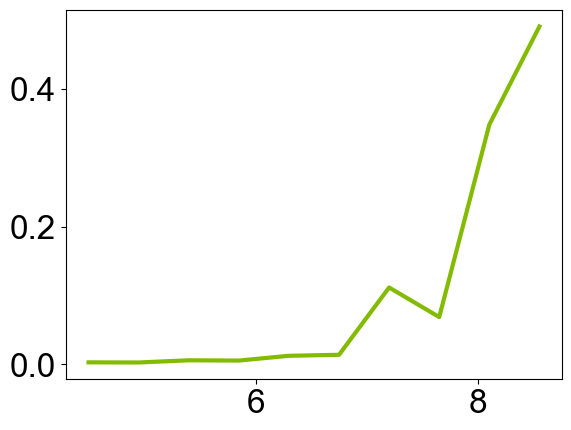

In [19]:
plt.plot(ndmorph1["Time (hpf)"],ndmorph1["NetworkDensity"],color="#83bb03",linewidth=3,label="Control")

In [20]:
#import data for control from figure 1
controldata=pd.read_csv("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/NetworkDensity/1604_NetworkDensity.csv")


In [21]:
def binner(dataframe,column,sourcedata,sourcecolumn):
    bin_edges= np.arange(4.0,9.5,0.5)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    dataframe["Time (hpf)"]=bin_centers
    binnedAvg=np.zeros(len(bin_centers))
    for i in range(len(bin_centers)):
        binnedAvg[i]=np.mean(sourcedata[sourcecolumn][(sourcedata["Time (hpf)"]>=bin_edges[i]) & (sourcedata["Time (hpf)"]<bin_edges[i+1])])
    dataframe[column]=binnedAvg
    return dataframe
morphantbinnedND=pd.DataFrame(columns=["Time (hpf)","K4K8MO_240123_Pos002","K4K8MO_18102022_Pos004","K4K8MO_18102022_Pos005"])
binner(morphantbinnedND,"K4K8MO_240123_Pos002",ndmorph1,"NetworkDensity")
binner(morphantbinnedND,"K4K8MO_18102022_Pos004",ndmorph2,"NetworkDensity")
binner(morphantbinnedND,"K4K8MO_18102022_Pos005",ndmorph3,"NetworkDensity")
morphantbinnedArea=pd.DataFrame(columns=["Time (hpf)","K4K8MO_240123_Pos002","K4K8MO_18102022_Pos004","K4K8MO_18102022_Pos005"])
binner(morphantbinnedArea,"K4K8MO_240123_Pos002",ndmorph1,"Area")
binner(morphantbinnedArea,"K4K8MO_18102022_Pos004",ndmorph2,"Area")
binner(morphantbinnedArea,"K4K8MO_18102022_Pos005",ndmorph3,"Area")
morphantbinnedIntensity=pd.DataFrame(columns=["Time (hpf)","K4K8MO_240123_Pos002","K4K8MO_18102022_Pos004","K4K8MO_18102022_Pos005"])
binner(morphantbinnedIntensity,"K4K8MO_240123_Pos002",ndmorph1,"Intensity")
binner(morphantbinnedIntensity,"K4K8MO_18102022_Pos004",ndmorph2,"Intensity")
binner(morphantbinnedIntensity,"K4K8MO_18102022_Pos005",ndmorph3,"Intensity")
mutantbinnedND=pd.DataFrame(columns=["Time (hpf)","K4K8Mutant_18012024_Pos003","K4K8Mutant_18012024_Pos004","K4K8Mutant_18012024_Pos005","K4K8Mutant_18012024_Pos006","K4K8Mutant_18012024_Pos007","K4K8Mutant_18012024_Pos008"])

binner(mutantbinnedND,"K4K8Mutant_18012024_Pos003",nddfp3,"NetworkDensity")
binner(mutantbinnedND,"K4K8Mutant_18012024_Pos004",nddfp4,"NetworkDensity")
binner(mutantbinnedND,"K4K8Mutant_18012024_Pos005",nddfp5,"NetworkDensity")
binner(mutantbinnedND,"K4K8Mutant_18012024_Pos006",nddfp6,"NetworkDensity")
binner(mutantbinnedND,"K4K8Mutant_18012024_Pos007",nddfp7,"NetworkDensity")
binner(mutantbinnedND,"K4K8Mutant_18012024_Pos008",nddfp8,"NetworkDensity")

mutantbinnedArea=pd.DataFrame(columns=["Time (hpf)","K4K8Mutant_18012024_Pos003","K4K8Mutant_18012024_Pos004","K4K8Mutant_18012024_Pos005","K4K8Mutant_18012024_Pos006","K4K8Mutant_18012024_Pos007","K4K8Mutant_18012024_Pos008"])
binner(mutantbinnedArea,"K4K8Mutant_18012024_Pos003",nddfp3,"Area")
binner(mutantbinnedArea,"K4K8Mutant_18012024_Pos004",nddfp4,"Area")
binner(mutantbinnedArea,"K4K8Mutant_18012024_Pos005",nddfp5,"Area")
binner(mutantbinnedArea,"K4K8Mutant_18012024_Pos006",nddfp6,"Area")
binner(mutantbinnedArea,"K4K8Mutant_18012024_Pos007",nddfp7,"Area")
binner(mutantbinnedArea,"K4K8Mutant_18012024_Pos008",nddfp8,"Area")

mutantbinnedIntensity=pd.DataFrame(columns=["Time (hpf)","K4K8Mutant_18012024_Pos003","K4K8Mutant_18012024_Pos004","K4K8Mutant_18012024_Pos005","K4K8Mutant_18012024_Pos006","K4K8Mutant_18012024_Pos007","K4K8Mutant_18012024_Pos008"])
binner(mutantbinnedIntensity,"K4K8Mutant_18012024_Pos003",nddfp3,"Intensity")
binner(mutantbinnedIntensity,"K4K8Mutant_18012024_Pos004",nddfp4,"Intensity")
binner(mutantbinnedIntensity,"K4K8Mutant_18012024_Pos005",nddfp5,"Intensity")
binner(mutantbinnedIntensity,"K4K8Mutant_18012024_Pos006",nddfp6,"Intensity")
binner(mutantbinnedIntensity,"K4K8Mutant_18012024_Pos007",nddfp7,"Intensity")
binner(mutantbinnedIntensity,"K4K8Mutant_18012024_Pos008",nddfp8,"Intensity")


,Time (hpf),K4K8Mutant_18012024_Pos003,K4K8Mutant_18012024_Pos004,K4K8Mutant_18012024_Pos005,K4K8Mutant_18012024_Pos006,K4K8Mutant_18012024_Pos007,K4K8Mutant_18012024_Pos008
0,4.25,NaN,NaN,NaN,NaN,NaN,NaN
1,4.75,343.492327,344.823688,310.513070,261.241638,340.003853,426.712419
2,5.25,386.353451,458.778860,306.711360,272.272829,344.760973,486.781011
3,5.75,407.226136,480.324044,323.620818,279.406271,366.027390,519.215676
4,6.25,460.314367,524.818946,320.533613,289.891720,376.515365,545.152264
5,6.75,484.316540,360.452590,323.056077,306.998918,393.363574,574.273442
6,7.25,504.567887,385.614894,307.173368,319.864453,403.297731,598.967061
7,7.75,505.162822,388.510178,323.633633,337.060109,429.255786,620.239356
8,8.25,548.199381,420.813622,331.937942,356.215227,450.038819,665.444729
9,8.75,561.378838,448.852891,340.330521,376.072930,478.269254,717.456556


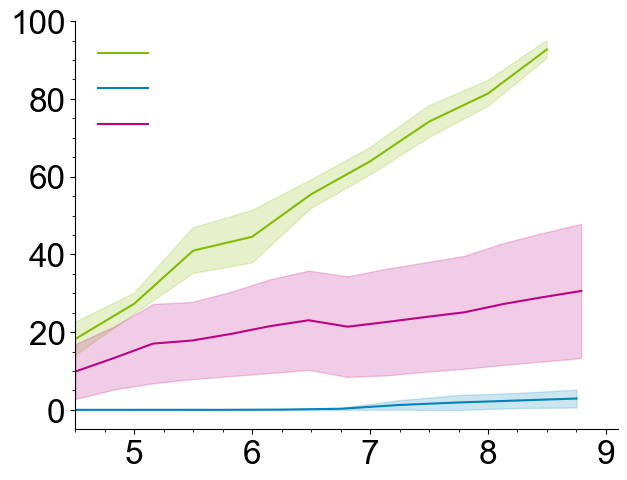

In [22]:
#plot the average network density for control vs K4K8 mutant embryos
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("Network density (%)")
ax.set_xlim(4.5,9.1)
ax.set_xticks(np.arange(4.5,9,0.25),minor=True)

ax.set_ylim(-5,100)
ax.set_yticks(np.arange(0,100,5),minor=True)

controlavg=np.mean([nddfp1["NetworkDensity"],nddfp2["NetworkDensity"]],axis=0)
controlsem=np.std([nddfp1["NetworkDensity"],nddfp2["NetworkDensity"]],axis=0)
mutantavg=np.mean([nddfp3["NetworkDensity"],nddfp4["NetworkDensity"],nddfp5["NetworkDensity"],nddfp6["NetworkDensity"],nddfp7["NetworkDensity"],nddfp8["NetworkDensity"]],axis=0)
mutantsem=np.std([nddfp3["NetworkDensity"],nddfp4["NetworkDensity"],nddfp5["NetworkDensity"],nddfp6["NetworkDensity"],nddfp7["NetworkDensity"],nddfp8["NetworkDensity"]],axis=0)
morphantmean=morphantbinnedND.iloc[:,1:].mean(axis=1).fillna(0)
morphantsem=morphantbinnedND.iloc[:,1:].std(axis=1).fillna(0)
ax.plot(controldata["Time (hpf)"][1:],controldata["Unnamed 0"][1:],color="#83bb03",label=" ")
ax.fill_between(controldata["Time (hpf)"][1:],controldata["Unnamed 0"][1:]-controldata["Unnamed 1"][1:],controldata["Unnamed 0"][1:]+controldata["Unnamed 1"][1:],alpha=0.2,color="#83bb03")

ax.plot(morphantbinnedND["Time (hpf)"],morphantmean,color="#0383bb",label="   ")
ax.fill_between(morphantbinnedND["Time (hpf)"],morphantmean-morphantsem,morphantmean+morphantsem,alpha=0.2,color="#0383bb")
ax.plot(nddfp3["Time (hpf)"],mutantavg,color="#bb0383",label="  ")
ax.fill_between(nddfp3["Time (hpf)"],mutantavg-mutantsem,mutantavg+mutantsem,alpha=0.2,color="#bb0383")
plt.legend(loc="best",frameon=False,fontsize=18)
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure3\\NetworkDensity\\"
if os.path.exists(outputfolder)==False:
    os.mkdir(outputfolder)
plt.savefig(outputfolder+"NetworkDensity_nolab.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"NetworkDensity_nolab.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig(outputfolder+"NetworkDensity_nolab.svg",transparent=True,bbox_inches='tight',dpi=300)

plt.show()

In [23]:
controlDNAbins=pd.read_csv("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/NetworkDensity/NetworkDensityData_3_16042024.csv")
controlDNAbins

,Unnamed: 0,Time (hpf),2503_NetworkDensity,2503_NetworkDensity_SEM,2503_Area,2503_Area_SEM,2503_Intensity,2503_Intensity_SEM,1801_NetworkDensity,1801_NetworkDensity_SEM,1801_Area,1801_Area_SEM,1801_Intensity,1801_Intensity_SEM,2410_NetworkDensity,2410_NetworkDensity_SEM,2410_Area,2410_Area_SEM,2410_Intensity,2410_Intensity_SEM
0,0,4.0,1.299400,NaN,710.232200,NaN,142.046800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.129545,NaN,728.480636,NaN,118.447068,NaN
1,1,4.5,19.052359,5.234859,614.920882,11.007056,177.404750,3.940250,25.224609,12.947446,690.105514,45.082208,120.803148,2.597148,10.380744,NaN,745.344884,NaN,120.925349,NaN
2,2,5.0,27.175667,NaN,599.891500,NaN,196.797250,NaN,22.692107,1.324844,647.596297,5.686499,119.606027,0.369253,32.030711,NaN,667.647053,NaN,133.593237,NaN
3,3,5.5,46.653931,2.030069,556.570391,7.028197,232.840132,12.422604,29.224897,1.883028,701.394693,4.850111,121.204454,0.490187,47.002107,NaN,647.393429,NaN,142.504357,NaN
4,4,6.0,57.509538,NaN,610.210538,NaN,258.050923,NaN,41.460099,4.961897,769.687792,28.512095,124.782272,1.634241,34.637755,NaN,678.827592,NaN,141.241633,NaN
5,5,6.5,61.107577,1.694302,696.439106,19.894406,275.937949,3.575124,56.759181,2.071345,907.380505,27.745404,129.119174,0.547578,48.517229,NaN,701.861667,NaN,149.395708,NaN
6,6,7.0,68.503791,NaN,730.986349,NaN,287.882907,NaN,66.307360,1.764265,952.590766,14.687646,131.850022,0.528485,56.990100,NaN,762.862420,NaN,152.730660,NaN
7,7,7.5,80.050502,3.835139,766.451163,23.888625,305.391145,2.210734,76.152058,2.596033,1008.669762,1.542238,135.078529,0.308334,66.224104,NaN,807.180250,NaN,156.993521,NaN
8,8,8.0,84.732424,NaN,842.904818,NaN,323.304455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.059596,NaN,831.362894,NaN,164.984234,NaN
9,9,8.5,90.404935,5.436435,967.395502,41.044461,337.975194,4.540639,NaN,NaN,NaN,NaN,NaN,NaN,95.063717,NaN,915.665435,NaN,168.801891,NaN


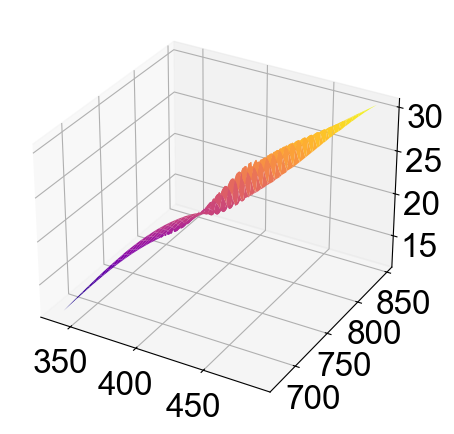

In [24]:
mutIntensity=mutantbinnedIntensity.iloc[1:,1:].mean(axis=1)
mutNetdensity=mutantbinnedND.iloc[1:,1:].mean(axis=1)
mutArea=mutantbinnedArea.iloc[1:,1:].mean(axis=1)
x2=np.linspace(mutIntensity.min(),mutIntensity.max(),500)
y2=np.linspace(mutArea.min(),mutArea.max(),500)
x2,y2=np.meshgrid(x2,y2)
z2=griddata((mutIntensity,mutArea),mutNetdensity,(x2,y2),method='cubic')
fig = plt.figure(figsize=(7, 5.3))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2,y2,z2,cmap='plasma',edgecolor='none')

In [25]:
morphArea.max()

NameError: name 'morphArea' is not defined

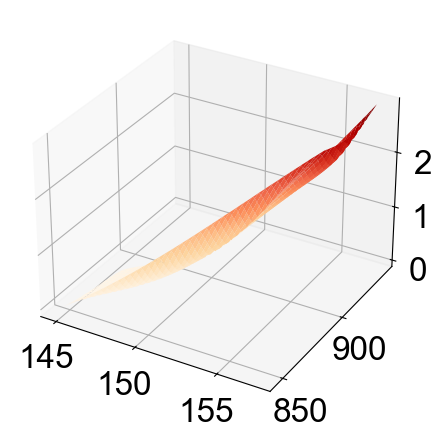

In [26]:
morphInt=morphantbinnedIntensity.iloc[1:,1:].mean(axis=1)
morphNetdensity=morphantbinnedND.iloc[1:,1:].mean(axis=1)
morphArea=morphantbinnedArea.iloc[1:,1:].mean(axis=1)
x3=np.linspace(morphInt.min(),morphInt.max(),500)
y3=np.linspace(morphArea.min(),morphArea.max(),500)
x3,y3=np.meshgrid(x3,y3)
z3=griddata((morphInt,morphArea),morphNetdensity,(x3,y3),method='cubic')
fig = plt.figure(figsize=(7, 5.3))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x3,y3,z3,cmap='OrRd',edgecolor='none')

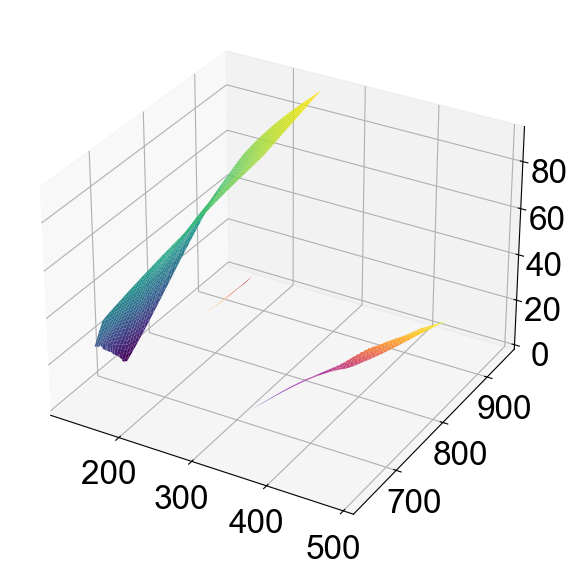

In [27]:
controlIntensity=controlDNAbins.iloc[:10,[6,12,18]].mean(axis=1)
controlIntensitySEM=controlDNAbins.iloc[:10,[6,12,18]].std(axis=1)
controlArea=controlDNAbins.iloc[:10,[4,10,16]].mean(axis=1)
controlAreaSEM=controlDNAbins.iloc[:10,[4,10,16]].std(axis=1)
controlNetDensity=controlDNAbins.iloc[:10,[2,8,14]].mean(axis=1)
controlNetDensitySEM=controlDNAbins.iloc[:10,[2,8,14]].std(axis=1)

x1=np.linspace(controlIntensity.min(),controlIntensity.max(),500)
y1=np.linspace(controlArea.min(),controlArea.max(),500)
x1,y1=np.meshgrid(x1,y1)
z1=griddata((controlIntensity,controlArea),controlNetDensity,(x1,y1),method="cubic")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

ax.plot_surface(x1, y1, z1, cmap='viridis',edgecolor='none')
ax.plot_surface(x3,y3,z3,cmap='OrRd',edgecolor='none')
ax.plot_surface(x2,y2,z2,cmap='plasma',edgecolor='none')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/NDA_3dplot/3Dplot_trisurfmorphmutatncontrol.pdf",transparent=True,bbox_inches='tight',dpi=300)    
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/NDA_3dplot/3Dplot_trisurfmorphmutatncontrol.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/NDA_3dplot/3Dplot_trisurfmorphmutatncontrol.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.show()

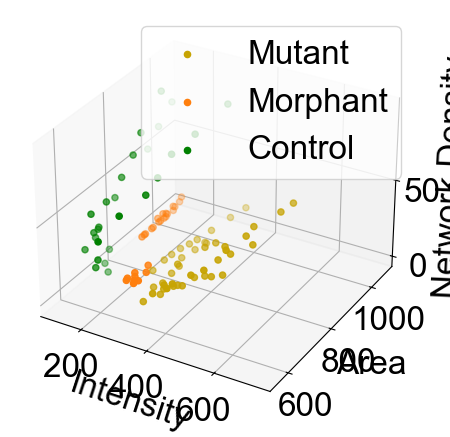

In [113]:
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

#plota 3d plot with the average network density vs area vs intensity for control vs k4k8 mutant embryos and K4K8 morphants as surface
fig=plt.figure(figsize=(7, 5.3))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

# Plot mutantl data

ax.scatter( mutantbinnedIntensity.iloc[:,1:], mutantbinnedArea.iloc[:,1:],mutantbinnedND.iloc[:,1:], c="#C7A403", label='Mutant')

# Plot morphant data
ax.scatter( morphantbinnedIntensity.iloc[:,1:], morphantbinnedArea.iloc[:,1:],morphantbinnedND.iloc[:,1:], c="#ff7f0e", label='Morphant')

# Plot control data
ax.scatter(controlDNAbins.iloc[:10,[6,12,18]], controlDNAbins.iloc[:10,[4,10,16]],controlDNAbins.iloc[:10,[2,8,14]],  c='green', label='Control')

# Set labels and title
ax.set_xlabel('Intensity')
ax.set_ylabel('Area')
ax.set_zlabel('Network Density')
#ax.set_title('3D Plot of Area, Mean Intensity, and Density')

# Add legend
ax.legend()

# Show the plot
plt.show()


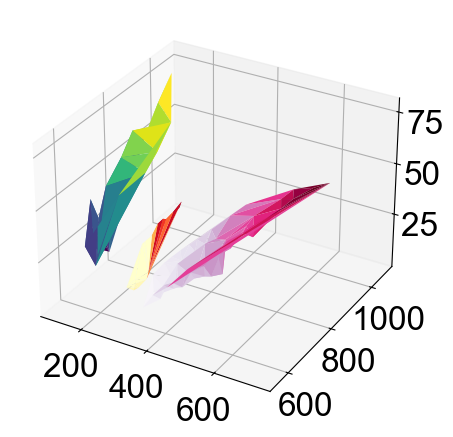

In [155]:
fig=plt.figure(figsize=(7, 5.3))
ax=fig.add_subplot(111,projection='3d')
# Plot mutant data
ax.plot_trisurf( mutantbinnedIntensity.iloc[:,1:].dropna().values.flatten(), mutantbinnedArea.iloc[:,1:].dropna().values.flatten(),mutantbinnedND.iloc[:,1:].dropna().values.flatten(), cmap=cm.PuRd, label='Mutant')#C7A403

# Plot morphant data
ax.plot_trisurf( morphantbinnedIntensity.iloc[:,1:].dropna().values.flatten(), morphantbinnedArea.iloc[:,1:].dropna().values.flatten(),morphantbinnedND.iloc[:,1:].dropna().values.flatten(), cmap=cm.YlOrRd, label='Morphant')#ff7f0e

# Plot control data
ax.plot_trisurf(controlDNAbins.iloc[:10,[6,12,18]].dropna().values.flatten(), controlDNAbins.iloc[:10,[4,10,16]].dropna().values.flatten(),controlDNAbins.iloc[:10,[2,8,14]].dropna().values.flatten(),  cmap=cm.viridis, label='Control')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/NDA_3dplot/test.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/NDA_3dplot/test.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/NDA_3dplot/test.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.show()

In [154]:
grid_x, grid_y=np.mgrid[controlDNAbins.iloc[:10,[6,12,18]].dropna().values.flatten().min():controlDNAbins.iloc[:10,[6,12,18]].dropna().values.flatten().max():100j, controlDNAbins.iloc[:10,[4,10,16]].dropna().values.flatten().min():controlDNAbins.iloc[:10,[4,10,16]].dropna().values.flatten().max():100j]
gridz1 = griddata((morphantbinnedIntensity.iloc[:,1:].dropna().values.flatten(), morphantbinnedArea.iloc[:,1:].dropna().values.flatten()), morphantbinnedND.iloc[:,1:].dropna().values.flatten(), (grid_x, grid_y), method='cubic')
ax.plot_surface(grid_x, grid_y, gridz1, cmap=cm.PuRd, label='Mutant')#C7A403
plt.show()

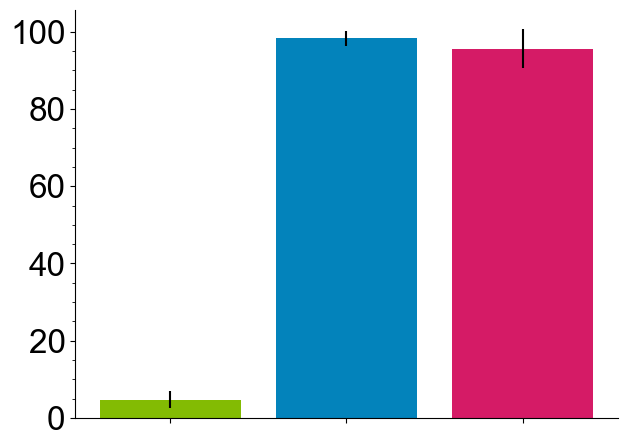

In [28]:
#Survival analysis for supplementary figure 1
morphantdead=[100,95,100,98]
mutantdead=[100,93,87,98,100]
controldead=[5,8,2,4]
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.bar(0,np.mean(controldead),color="#83bb03",label=" ")
ax.bar(1,np.mean(morphantdead),color="#0383bb",label=" ")
ax.bar(2,np.mean(mutantdead),color="#D51B66",label=" ")
ax.errorbar(0,np.mean(controldead),yerr=np.std(controldead),color="black")
ax.errorbar(1,np.mean(morphantdead),yerr=np.std(morphantdead),color="black")
ax.errorbar(2,np.mean(mutantdead),yerr=np.std(mutantdead),color="black")
ax.set_xticks([0,1,2])

ax.set_yticks(np.arange(0,100,5),minor=True)
ax.set_xticklabels(["","",""])
ax.set_ylabel("")
#plt.legend(loc="upper left",frameon=False,fontsize=18)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/Supimages/DeadEmbryos.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/Supimages/DeadEmbryos.png",transparent=True,bbox_inches='tight',dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/Supimages/DeadEmbryos.svg",transparent=True,bbox_inches='tight',dpi=300)
plt.show()

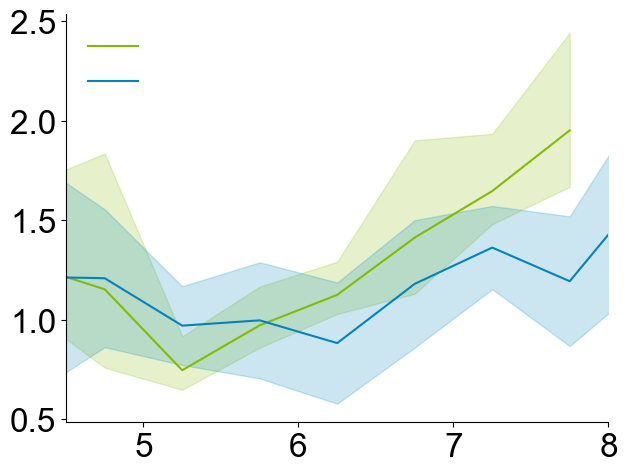

In [43]:
speeddnkrt18=pd.read_csv("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMorphantSpeed/dnKrt18SpeedData.csv")
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300   
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
dnkr18column=[col for col in speeddnkrt18.columns if "dnKrt18" in col]
controlcolumn=[col for col in speeddnkrt18.columns if "control" in col]
plt.xlim(4.5,8)
plt.plot(speeddnkrt18["Time (hpf)"][:-1],speeddnkrt18[controlcolumn].mean(axis=1)[:-1],color="#83bb03",label="         ")
plt.fill_between(speeddnkrt18["Time (hpf)"][:-1],speeddnkrt18[controlcolumn].mean(axis=1)[:-1]-speeddnkrt18[controlcolumn].sem(axis=1)[:-1],speeddnkrt18[controlcolumn].mean(axis=1)[:-1]+speeddnkrt18[controlcolumn].std(axis=1)[:-1],alpha=0.2,color="#83bb03")
plt.plot(speeddnkrt18["Time (hpf)"],speeddnkrt18[dnkr18column].mean(axis=1),color="#0383bb",label=" ")
plt.fill_between(speeddnkrt18["Time (hpf)"],speeddnkrt18[dnkr18column].mean(axis=1)-speeddnkrt18[dnkr18column].std(axis=1),speeddnkrt18[dnkr18column].mean(axis=1)+speeddnkrt18[dnkr18column].std(axis=1),alpha=0.2,color="#0383bb")
plt.legend(loc="upper left",frameon=False,fontsize=18)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMorphantSpeed/dnKrt18SpeedPlot.png", bbox_inches='tight',transparent=True,dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMorphantSpeed/dnKrt18SpeedPlot.pdf", bbox_inches='tight',transparent=True,dpi=300)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure3/KeratinMorphantSpeed/dnKrt18SpeedPlot.svg", bbox_inches='tight',transparent=True,dpi=300)
plt.show()


In [41]:
speeddnkrt18

,Time (hpf),dnKrt18_28072020_Pos001,dnKrt18_28072020_Pos002,dnKrt18_28072020_Pos003,control_28072020_Pos004,control_28072020_Pos005,control_28072020_Pos006
0,4.25,1.549294,0.518801,1.581664,1.734330,1.021799,1.076369
1,4.75,1.520778,1.269224,0.836435,1.832507,0.469452,1.158033
2,5.25,1.056138,1.111419,0.744846,0.587369,0.926547,0.727294
3,5.75,0.744600,0.931277,1.316276,0.932534,1.183323,0.801221
4,6.25,0.638959,0.786403,1.224168,0.979832,1.089438,1.306926
5,6.75,1.431186,0.820250,1.290331,1.078392,1.186822,1.972842
6,7.25,1.244427,1.239779,1.603891,1.588772,1.391980,1.958298
7,7.75,1.379459,0.818035,1.383997,1.940417,1.466563,2.446614
8,8.25,1.992035,1.334129,NaN,2.525654,NaN,NaN
